# Optimizing Performance: Grid Search and K-Fold Mastery 🛠️🔄

Welcome to this hands-on notebook where we'll turbocharge our basic Convolutional Neural Network (ConvD) and Dense Neural Network models. We kept this entire notebook simple and effective with some basic layers and grid search.

## The Practical Edge of Simplicity 🧰

In the real world, practical solutions often outshine complexity. We'll harness the simplicity of basic models, proving that with the right tweaks, they can outperform their flashier counterparts.

## Grid Search: Navigating Hyperparameter Space 🗺️

Think of grid search as our compass through the vast sea of hyperparameters. We'll systematically explore different combinations, aiming to discover the optimal settings. No magic wands – just practical steps toward better model performance.

## K-Fold Cross Validation: Robust Evaluation 🛡️

Single train-test splits can be deceiving. Enter K-Fold Cross Validation – our shield against overfitting illusions. By training and evaluating our model on multiple subsets, we ensure a robust performance measure that stands up to real-world challenges.

## Let's Get Practical with Code! 🚀👩‍💻

Enough theory, let's code! We'll build our basic model, set up a grid of hyperparameter values, and employ K-Fold Cross Validation for a realistic evaluation.

In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
test_file = (f"/kaggle/input/digit-recognizer/test.csv")
test_csv = pd.read_csv(test_file)
train_file = (f"/kaggle/input/digit-recognizer/train.csv")
train_csv = pd.read_csv(train_file)

In [3]:
train_csv.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
train_csv

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualiztion 

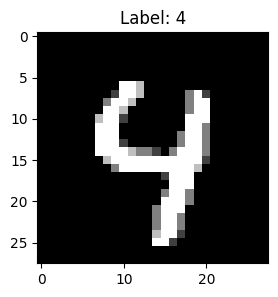

In [5]:
row_index = 78  # Change this to the desired row index
label = train_csv.loc[row_index, 'label']
pixels = train_csv.loc[row_index, 'pixel0':'pixel783'].values
image = pixels.reshape(28, 28)  # it's a 28x28 image

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.show()

### Preprocessing for train_csv

> Neural networks often perform better when the input data is normalized. Scaling pixel values between 0 and 1 is a common normalization technique for image data. This ensures that the neural network's weights are updated more uniformly during training, preventing one set of features from dominating others.
> 
> Convolutional Neural Networks (CNNs) typically expect input data in a specific format, especially when dealing with image data. The reshaping is done to convert the flat array of pixel values into a 4D tensor with dimensions (number of samples, height, width, channels). 
> 
> Many pre-trained CNN architectures or existing models are designed for color images (RGB format). If you plan to use such models, you need to convert your grayscale images to RGB format. The np.repeat operation duplicates the single-channel image into three channels, creating an RGB representation.

In [6]:
X = train_csv.loc[:, 'pixel0':'pixel783'].values / 255.0
y = train_csv['label']
X_train_reshaped = X.reshape(-1, 28, 28, 1)
X_train_rgb = np.repeat(X_train_reshaped, 3, axis=-1)
X_train_rgb.shape,y.unique().shape

((42000, 28, 28, 3), (10,))

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_rgb, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((33600, 28, 28, 3), (8400, 28, 28, 3), (33600,), (8400,))

### Preprocessing for test_csv

In [8]:
X_test_csv = test_csv.loc[:, 'pixel0':'pixel783'].values / 255.0
X_test_csv_reshaped = X_test_csv.reshape(-1, 28, 28, 1)
X_test_csv_rgb = np.repeat(X_test_csv_reshaped, 3, axis=-1)
X_test_csv_rgb.shape

(28000, 28, 28, 3)

In [9]:
num_classes = 10
IMAGE_SHAPE = (28,28)
input_shape = (28, 28, 3)

### Building the model architecture

> As you can see in the below code snippet, we have kept the model really simple with only some parameters and some layers that are needed for image detection such as Conv2D, Maxpooling, Flatten, Dense and Dropout layers. The deliberate simplicity of the design underscores a strategic approach, where each layer serves a purpose integral to the goal of accurate image detection.

In [10]:
def create_model(conv_units, dense_units, learning_rate, kernel_size, dropout_rate):
    model = Sequential()
    model.add(Conv2D(conv_units, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=["accuracy"])

    return model


### Grid_search and hyperparameter tuning

> We have commented out the below code because we got our best hyperparamters from the param_grid and don't want again to run this below cell. However you guys can uncomment it play around with the hyperparametes and take the best ones for the further processing.
> 
> Aslo you can see that we have used the X_val set for the validation. With that we can have an idea that how our model is going to perfom on new and unsee datasets.

In [11]:
# # Define the hyperparameter grid
# param_grid = {
#     'conv_units': [32, 64],
#     'dense_units': [64, 128],
#     'learning_rate': [0.001, 0.01],
#     'kernel_size': [(3, 3), (5, 5)],
#     'dropout_rate': [0.25, 0.5]
# }

# # Set the fixed batch size
# fixed_batch_size = 32

# # Generate all possible combinations of hyperparameters
# param_combinations = list(ParameterGrid(param_grid))

# # Iterate over each combination and train the model
# for params in param_combinations:
#     print("Training with hyperparameters:", params)
    
    
#     # Create the model
#     model = create_model(**params)
    
#     # Train the model (replace X_train and y_train with your data)
#     model.fit(X_train, y_train, epochs=10, batch_size=fixed_batch_size, validation_split=0.2, verbose=0)
    
#     # Evaluate the model (replace X_test and y_test with your test data)
#     loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

#     print("Evaluation - Loss: {:.4f}, Accuracy: {:.4f}\n".format(loss, accuracy))
#     print("----------------------------")
    


### Kfold Cross Validation and model training

> Inside the loop, a CNN model is created and compiled using the specified hyperparameters. This model is then trained on the current fold of the data, and its accuracy is evaluated on the validation set. The results are printed for each fold, providing insights into how well the model generalizes to different subsets of the data.
> 
> The fold-wise validation accuracies are recorded, allowing for a comprehensive assessment of the model's consistency across various data partitions. This k-fold cross-validation approach enhances the reliability of performance metrics and aids in the selection of a robust and well-generalized model for the image detection task.

Fold 1: Validation Accuracy = 0.9858630895614624


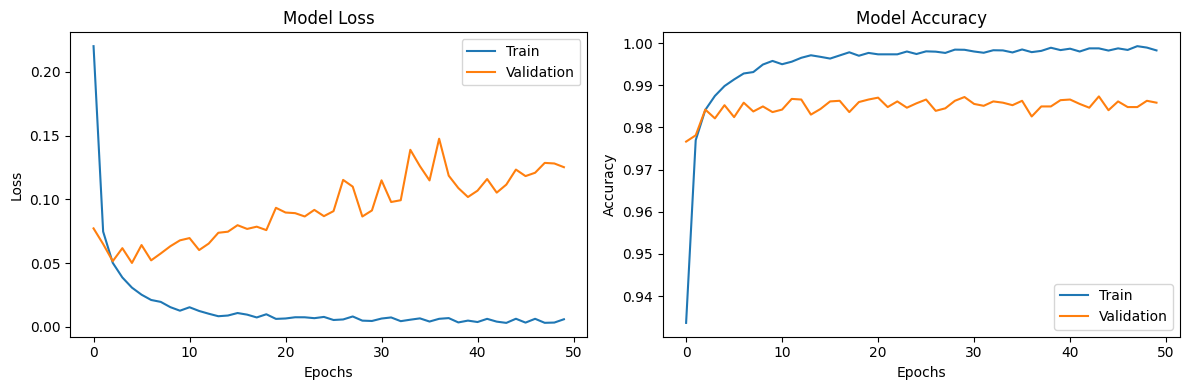

210/210 [==============================] - 0s 1ms/step


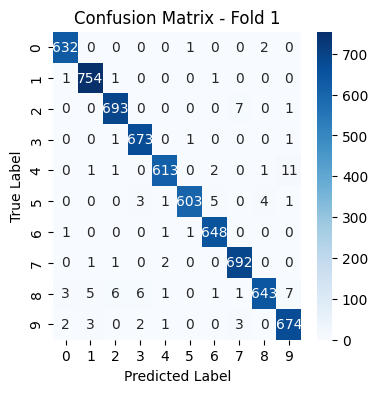

--------------------------------------------
Fold 2: Validation Accuracy = 0.9858630895614624


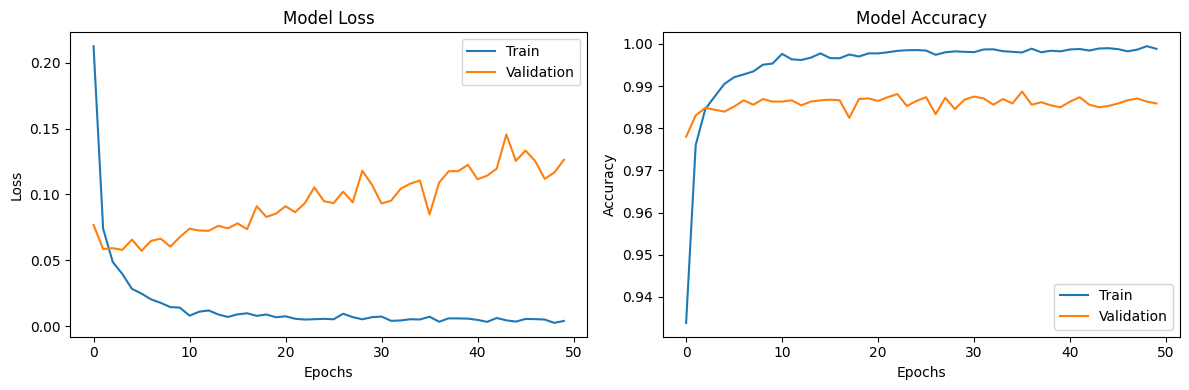

210/210 [==============================] - 0s 2ms/step


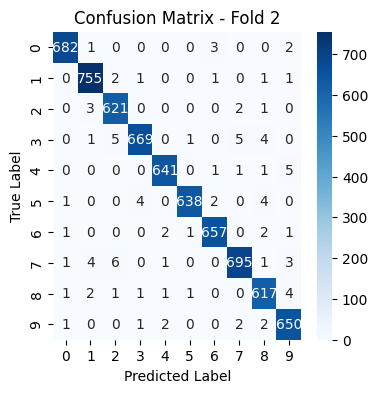

--------------------------------------------
Fold 3: Validation Accuracy = 0.9888392686843872


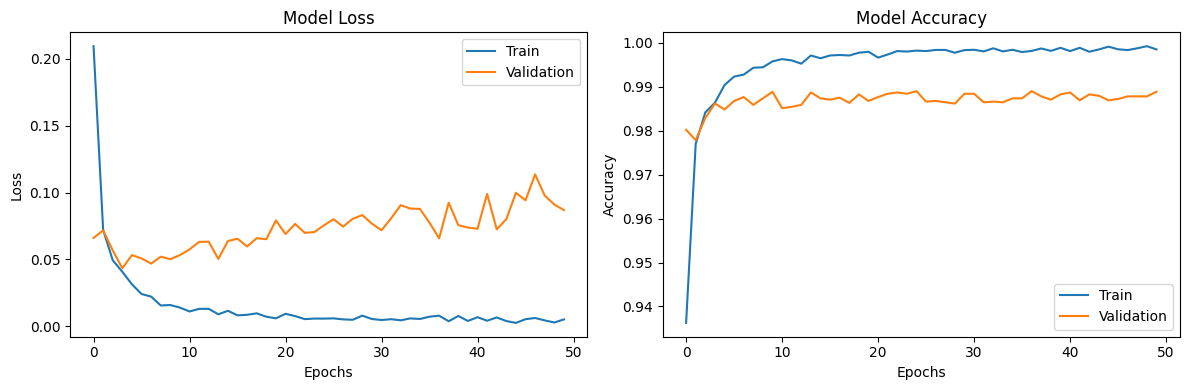

210/210 [==============================] - 0s 2ms/step


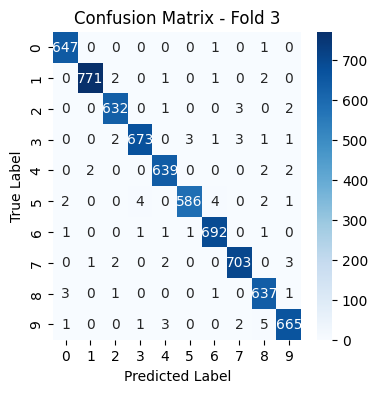

--------------------------------------------
Fold 4: Validation Accuracy = 0.9879464507102966


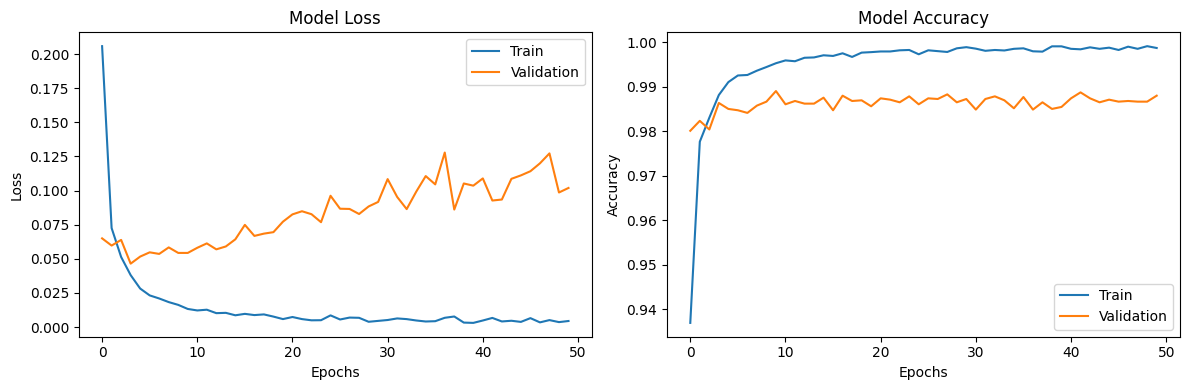

210/210 [==============================] - 0s 1ms/step


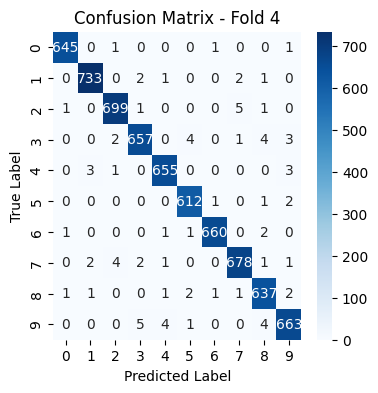

--------------------------------------------
Fold 5: Validation Accuracy = 0.9876487851142883


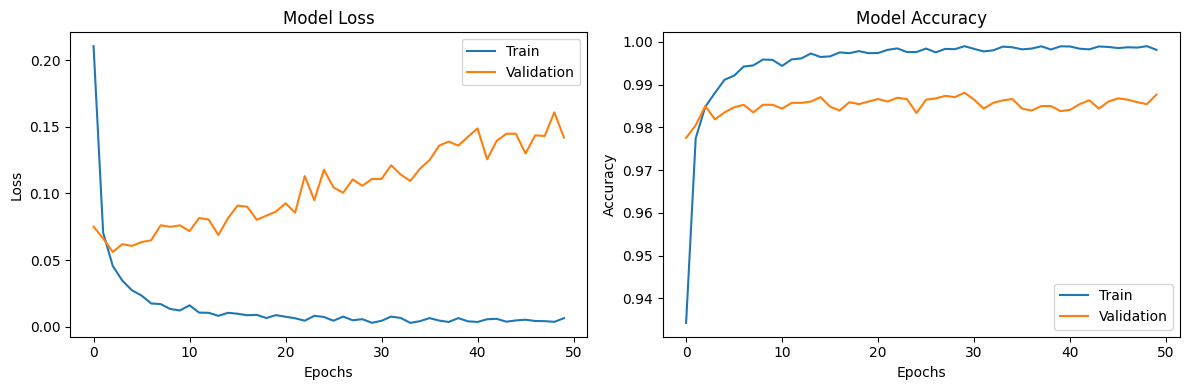

210/210 [==============================] - 0s 1ms/step


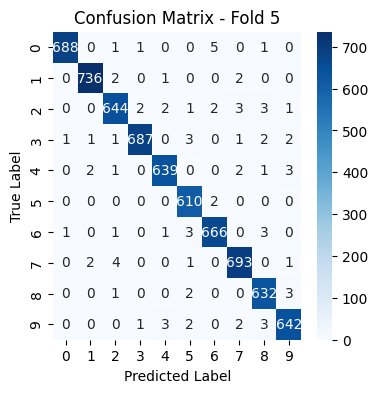

--------------------------------------------


In [12]:

# Training with hyperparameters: {'conv_units': 32, 'dense_units': 128, 'dropout_rate': 0.25, 'kernel_size': (5, 5), 'learning_rate': 0.001}
# Evaluation - Loss: 0.0501, Accuracy: 0.9889
from sklearn.model_selection import KFold

k = 5  # You can adjust the number of folds as needed
acc_scores = []
trained_models = {}
fixed_batch_size = 32
# Create a KFold object to split your data into folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Convert y_train to a NumPy array
y_train_array = np.array(y_train)

fold_number = 1  # Initialize fold number
for train_indices, val_indices in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train_array[train_indices], y_train_array[val_indices]

    # Create and compile the model with the best hyperparameters
    best_learning_rate = 0.001
    best_dense_units = 128
    conv_units = 32
    kernel_size = (5,5)
    dropout_rate = 0.25

    # Create and compile the model with the specified hyperparameters
    model = create_model(conv_units=conv_units,
                         dense_units=best_dense_units,
                         learning_rate=best_learning_rate,
                         kernel_size=kernel_size,
                         dropout_rate=dropout_rate)

    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=fixed_batch_size, verbose=0, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_number}: Validation Accuracy = {accuracy}")

    # Plot loss and accuracy curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = y_val_fold
    cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Fold {}'.format(fold_number))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    trained_models[fold_number] = model
    fold_number += 1
    acc_scores.append(accuracy)
    print("--------------------------------------------")


In [13]:
trained_models

{1: <keras.engine.sequential.Sequential at 0x78ecb58cb7f0>,
 2: <keras.engine.sequential.Sequential at 0x78ecb2b6b9a0>,
 3: <keras.engine.sequential.Sequential at 0x78ec7915e020>,
 4: <keras.engine.sequential.Sequential at 0x78ec178d0ca0>,
 5: <keras.engine.sequential.Sequential at 0x78ecb5746410>}

> Here mean_prediction represents the averaged prediction for each data point based on the ensemble of models. This consolidated prediction provides a more stable and robust estimate compared to predictions from individual folds, contributing to improved overall performance.

In [14]:
individual_predictions = []

# Iterate through the trained models and make predictions
for fold_number, model in trained_models.items():
    predictions = model.predict(X_test_csv_rgb)
    individual_predictions.append(predictions)

# Calculate the mean of all predictions
mean_prediction = np.mean(individual_predictions, axis=0)

875/875 [==============================] - 1s 1ms/step


In [15]:
mean_prediction.shape

(28000, 10)

> ### Note 📝: 
> In machine learning the worth of our model's prediction lies on the precision of shaping inputs and outputs for our models. We need to align our data's entry with the model's expectations, defining input shapes with care. As the data navigates neural pathways, the output shape represnst what our model have understood returns the model's insights. If we don't take of this crucial step we might end up getting errors. That is why shaping our inputs and outpus in machine learning is hight important.

## Submitting to Kaggle

In [16]:
submissions_file = (f"/kaggle/input/digit-recognizer/sample_submission.csv")
sample_submission = pd.read_csv(submissions_file)
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [17]:
image_ids = range(1, len(mean_prediction) + 1)

# Create a DataFrame with 'ImageId' and 'Label' columns
submission_df = pd.DataFrame({'ImageId': image_ids, 'Label': mean_prediction.argmax(axis=1)})


In [18]:
sample_submission['Label'] = submission_df['Label']
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


## Scope for Improvement

1. You can ddd the same layers which are present in the model architecture more times to improve the accuracy.
2. Increase the number of epochs while grid_searh
3. Add more hyperparameters(other than the one used in this notebook) for tuning.
4. You can practice data augumentation before giving it to the model.